# Population Data
A marketing firm wants to launch a promotional campaign in different
regions of the country. So, in order to do that, they need to understand
which areas they should focus their resources in order to cover the entire
region. We are provided with the population data based on different
locations along with the demographics.
The objective is to segregate the regions into different groups so that the
marketing team can plan their resources accordingly. So we have to apply
classification techniques in order to segregate the regions into different
clusters which will help the marketing team.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# Importing Data
data = pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [4]:
#first look
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [5]:
#Isolating numerical columns
numeric = ["Indians","Foreigners",
           "Indian_Male","Indian_Female",
           "Foreigners_Female",
           'Foreigners_Male',"Total Population"]

In [6]:
#Function to remove comma from the numeric data
def cleaner(z):
  return z.replace(',','')

#testing
cleaner('100,234')

'100234'

In [7]:
#Removing comma from all the numeric data
for i in data[numeric]:
  data[i] = data[i].apply(cleaner)

data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [9]:
# Converting numerical columns to numeric datatype
data[numeric] = data[numeric].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     int64 
 3   Foreigners          38 non-null     int64 
 4   Indian_Male         38 non-null     int64 
 5   Indian_Female       38 non-null     int64 
 6   Foreigners_Male     38 non-null     int64 
 7   Foreigners_Female   38 non-null     int64 
 8   Total Population    38 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


In [10]:
#verifying whether Indian + Foreigner population = Total Population
data[['Indians','Foreigners']].sum().sum() - data['Total Population'].sum()

0

In [17]:
# Verifying whether Indian(male+female) +Foreigner(male+female) = Total population
data[['Indian_Male','Indian_Female',"Foreigners_Male",'Foreigners_Female']].sum().sum() - data['Total Population'].sum()

-112859

In [10]:
# Storing the difference as new column "others"
MF_sum = data['Indian_Male'] + data['Indian_Female'] + data["Foreigners_Male"] + data['Foreigners_Female']
data['other'] = data['Total Population'] - MF_sum
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,other
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [13]:
# Verifying whether Indian(male+female) = Indian population
data[['Indian_Male','Indian_Female']].sum().sum() - data['Indians'].sum()

0

In [18]:
# Verifying whether Indian(male+female) = Indian population
data[['Foreigners_Male','Foreigners_Female']].sum().sum() - data['Foreigners'].sum()

-112859

In [11]:
# Storing the difference as new column "others"
MF_sum = data['Foreigners_Male'] + data['Foreigners_Female']
data['Foreigners_other'] = data['Foreigners'] - MF_sum
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,other,Foreigners_other
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191,1191


In [12]:
#checking the unique office location ids
data['Region'].nunique(),data['Office Location Id'].nunique()

(38, 38)

In [21]:
#dropping office location ids
data1 = data.drop(columns = ['Region',"Office Location Id","Total Population","other"])
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Foreigners_other
0,643596,2883782,440445,203151,2763718,72515,47549
1,319933,1501899,213477,106456,1449303,27671,24925
2,194379,650744,161803,32576,631660,10652,8432
3,107360,470708,85343,22017,450267,6389,14052
4,55351,329980,31796,23555,325105,3684,1191


In [22]:
# Normalizing Data
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns = data1.columns
data1 = norm.fit_transform(data1)
data1 = pd.DataFrame(data1,columns = columns)
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Foreigners_other
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544


In [25]:
## Plotting elbow curve for K-means
from sklearn.cluster import KMeans
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(data1)
    SSE.append(kmeans.inertia_)

In [27]:
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
frame.head()

,Cluster,SSE
0,1,0.072260
1,2,0.028113
2,3,0.017667
3,4,0.012200
4,5,0.009471


Text(0, 0.5, 'Inertia')

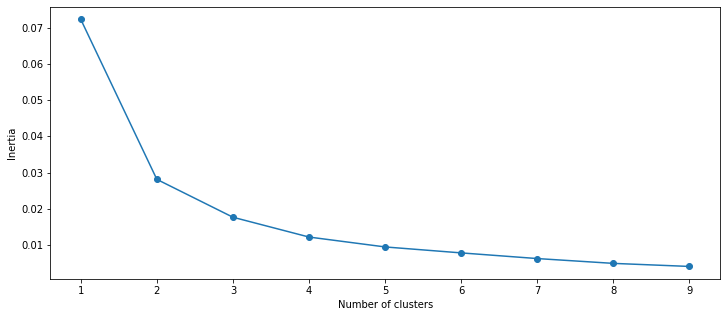

In [35]:
plt.figure(figsize=(12,5))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [36]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data1)
pred=kmeans.predict(data1)

In [39]:
data1['cluster'] = pred
display(data1)

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Foreigners_other,cluster
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666,2
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728,2
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950,1
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092,1
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544,0
5,0.189933,0.698689,0.166697,0.023236,0.668407,0.005031,0.025251,1
6,0.118499,0.707917,0.096517,0.021982,0.689077,0.011379,0.007461,2
7,0.131558,0.704556,0.089750,0.041808,0.690152,0.013378,0.001027,2
8,0.116776,0.707740,0.087786,0.028990,0.690475,0.011387,0.005877,2
9,0.133395,0.705656,0.089055,0.044340,0.688563,0.015363,0.001730,2


In [65]:
def seg(str_x, str_y, clusters):
  x = []
  y = []

  for i in range(clusters):
    x.append(data1[str_x][data1['cluster']==i])
    y.append(data1[str_y][data1['cluster']==i])
  
  return x,y

def plot_clusters(str_x, str_y, clusters):
  plt.figure(figsize = (5,5), dpi = 100)
  
  x,y = seg(str_x, str_y, clusters)

  for i in range(clusters):
    plt.scatter(x[i], y[i], label = 'cluster {}'.format(i))
  
  plt.xlabel(str_x)
  plt.ylabel(str_y)
  plt.title(str(str_x+" Vs "+str_y))
  plt.legend()
  return ''

C:\Users\Hatim\AppData\Local\Temp/ipykernel_9780/3061950603.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (5,5), dpi = 100)


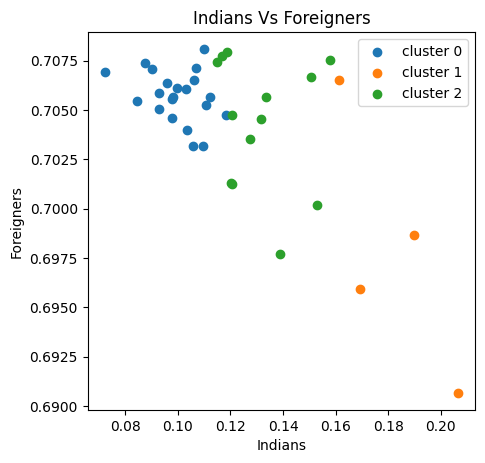

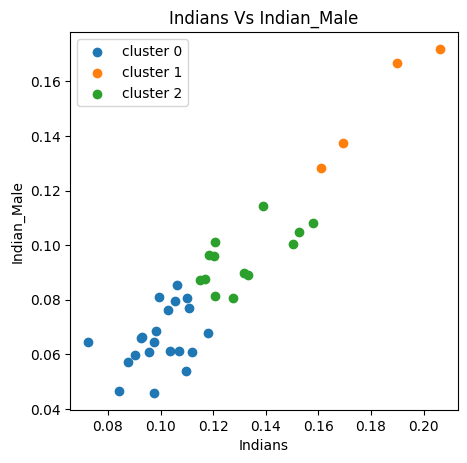

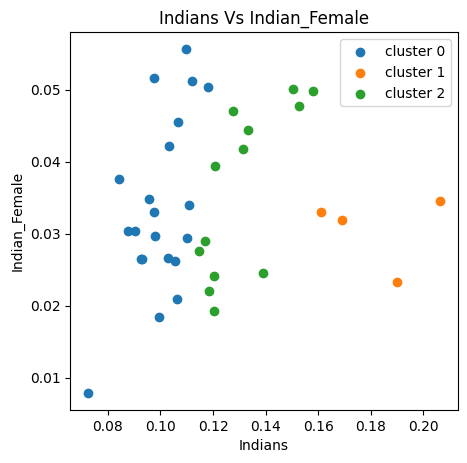

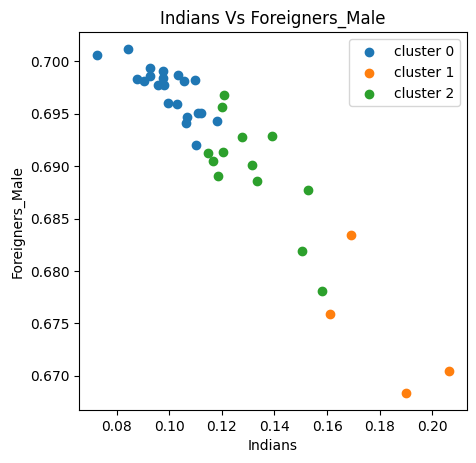

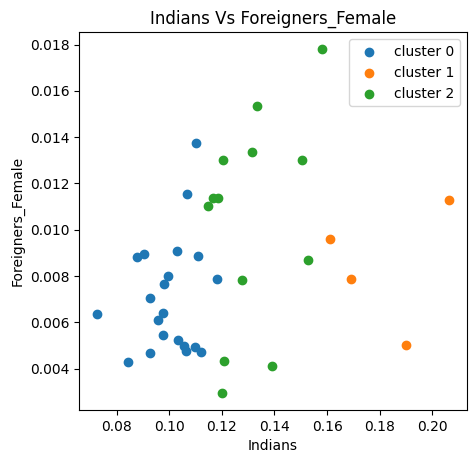

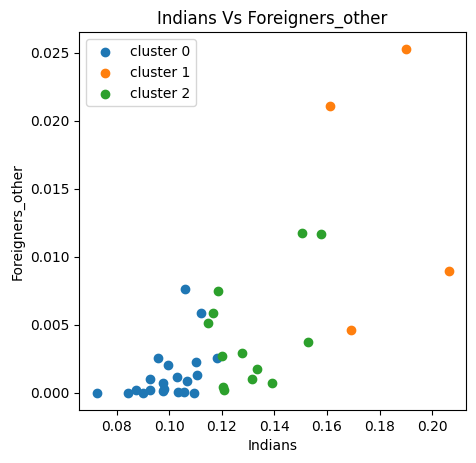

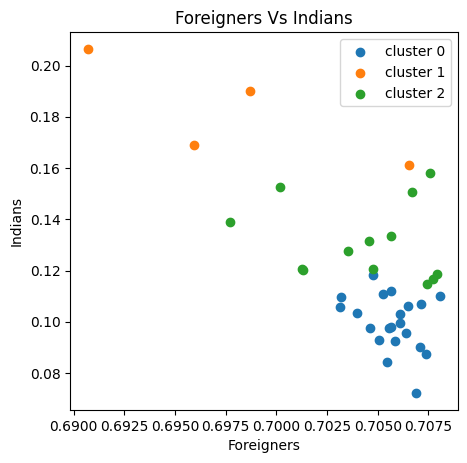

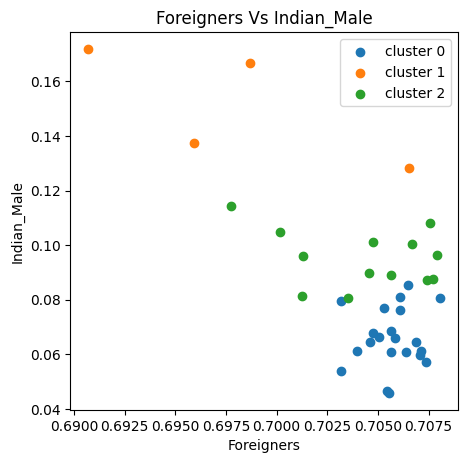

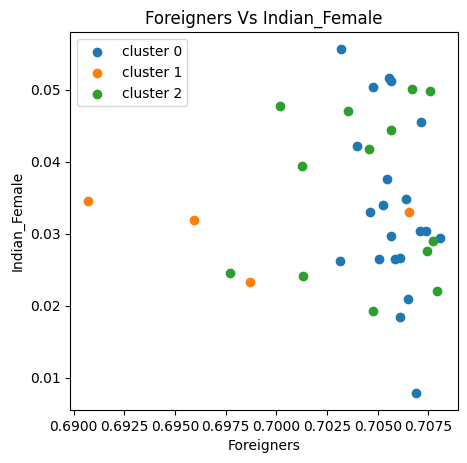

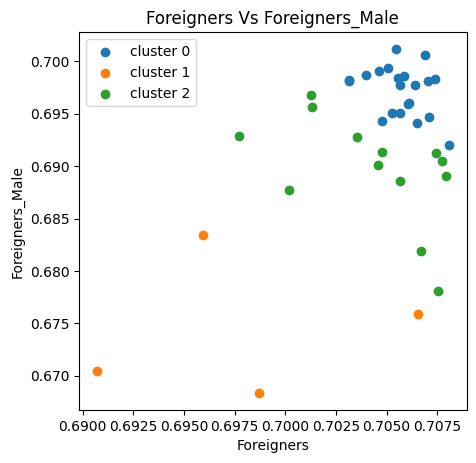

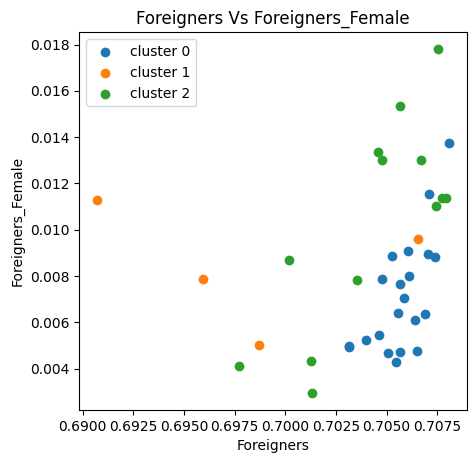

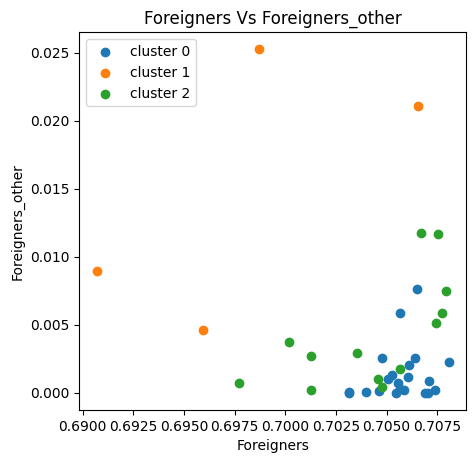

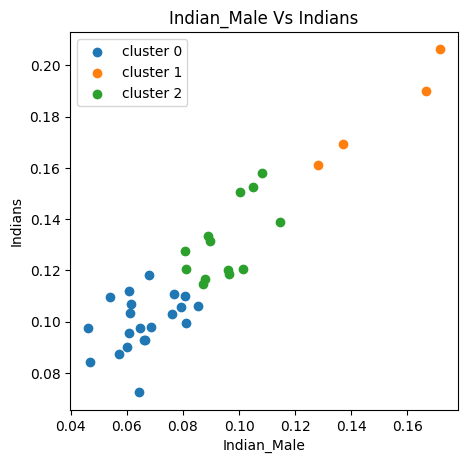

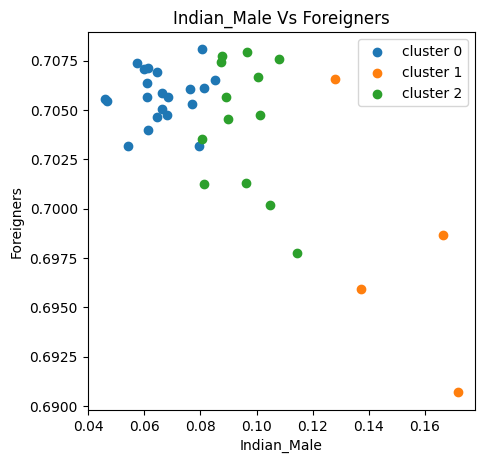

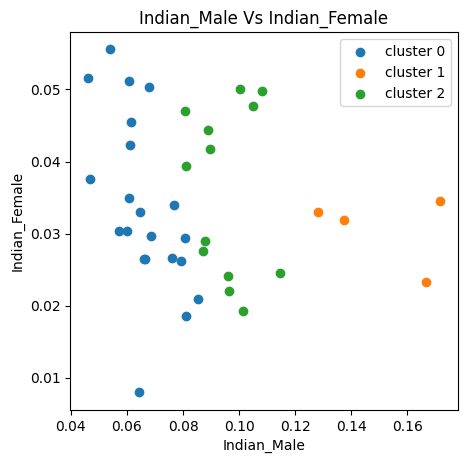

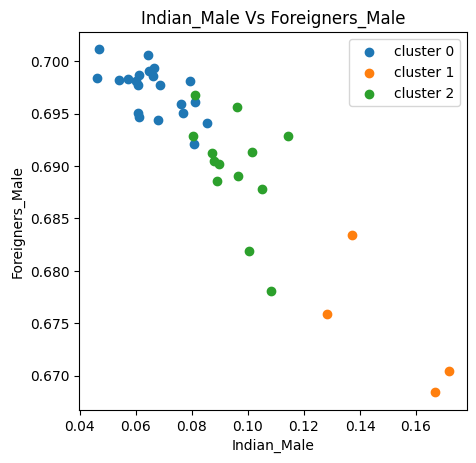

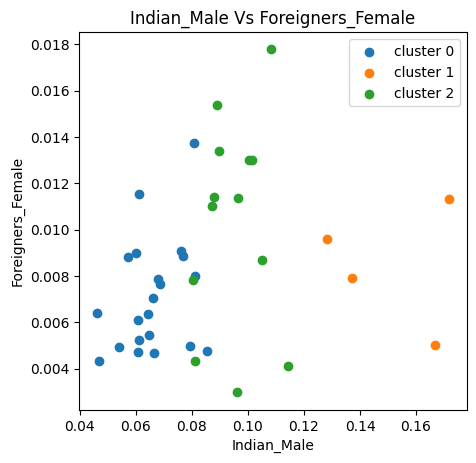

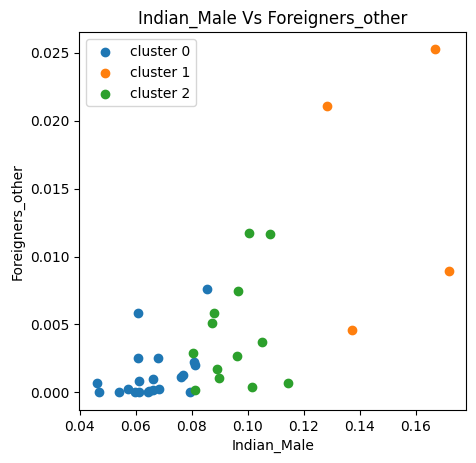

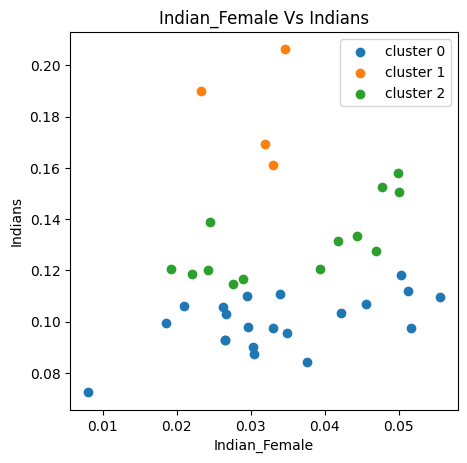

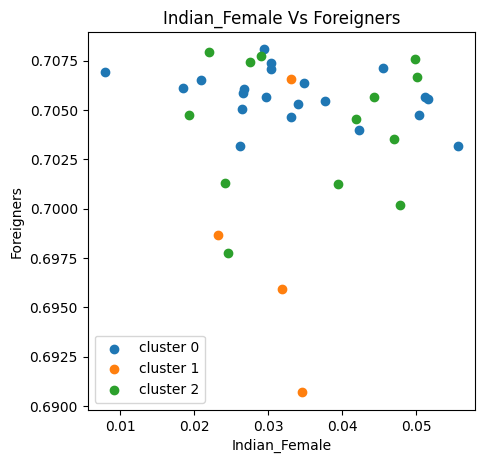

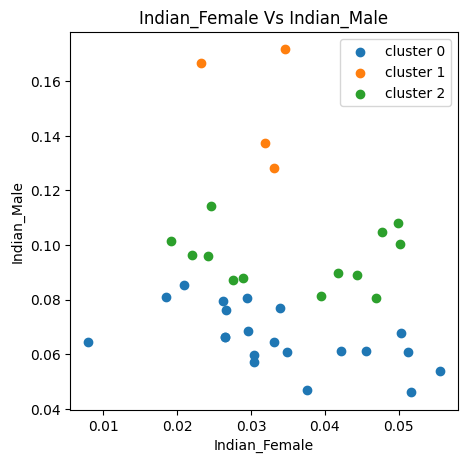

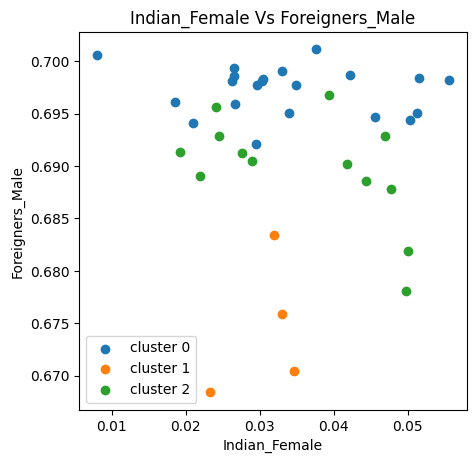

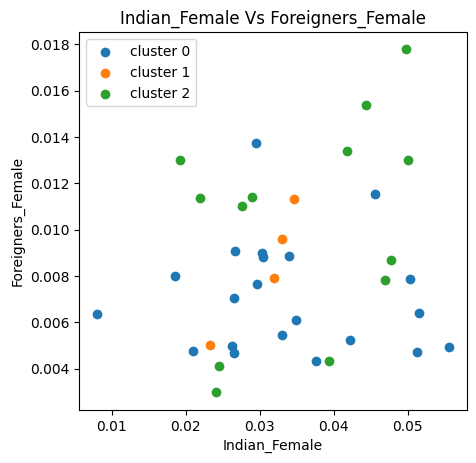

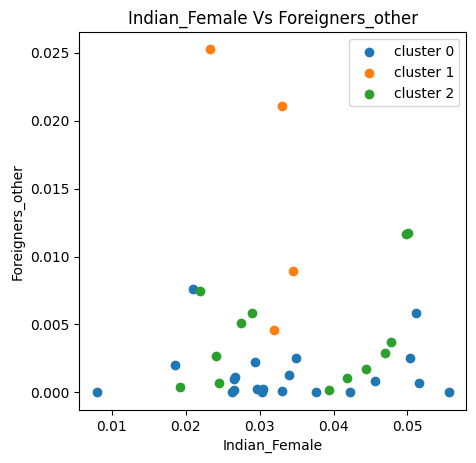

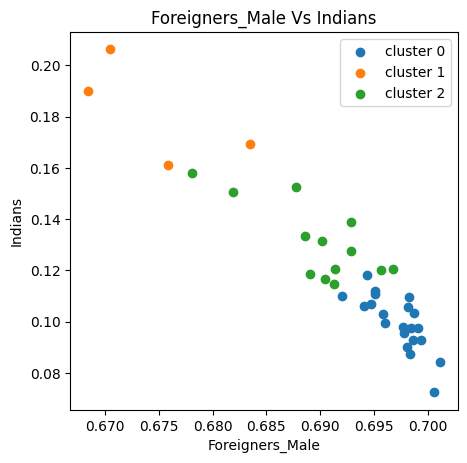

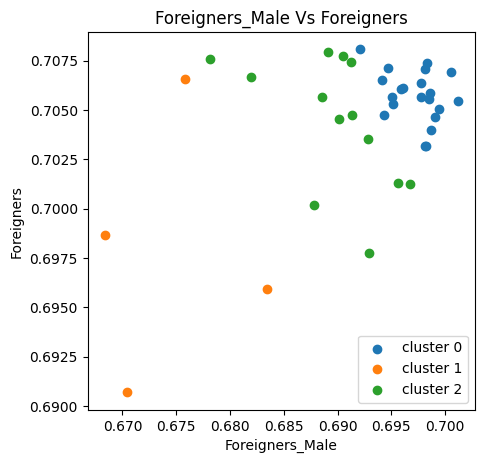

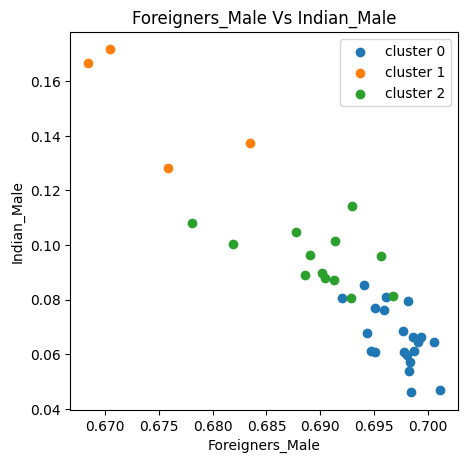

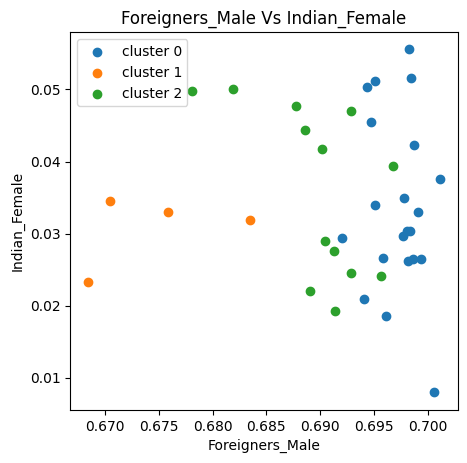

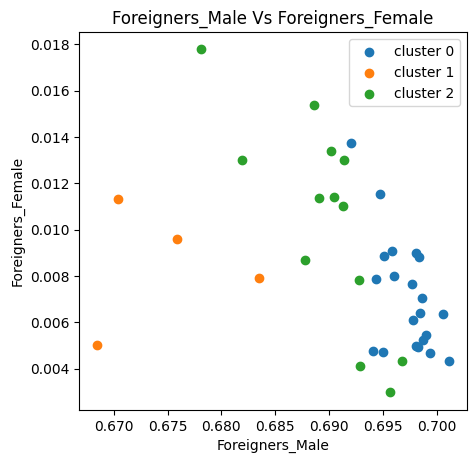

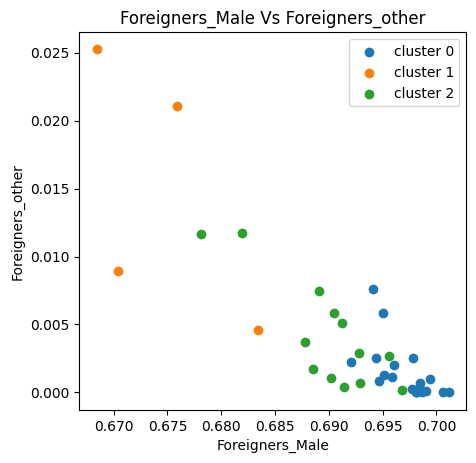

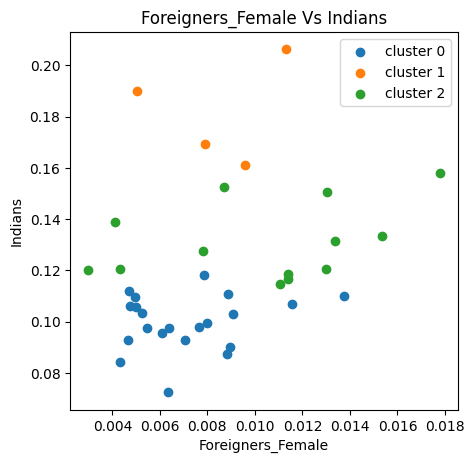

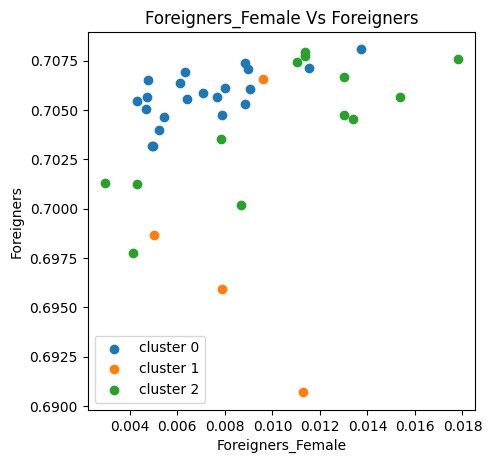

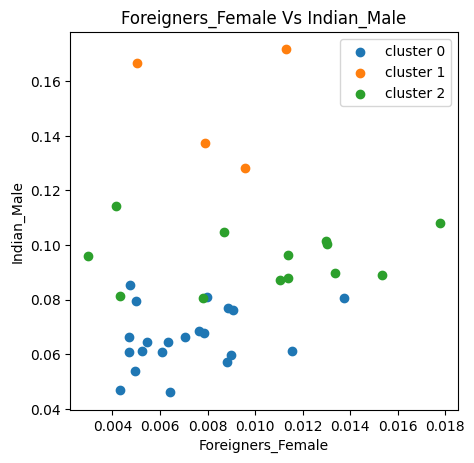

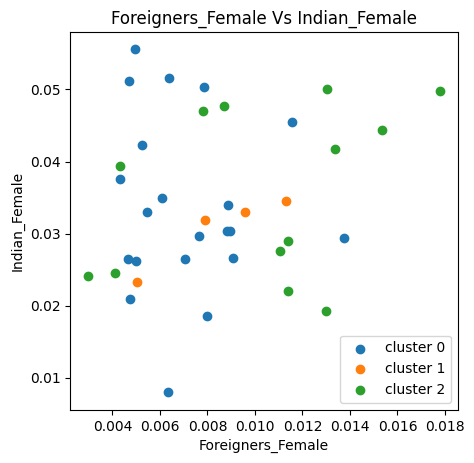

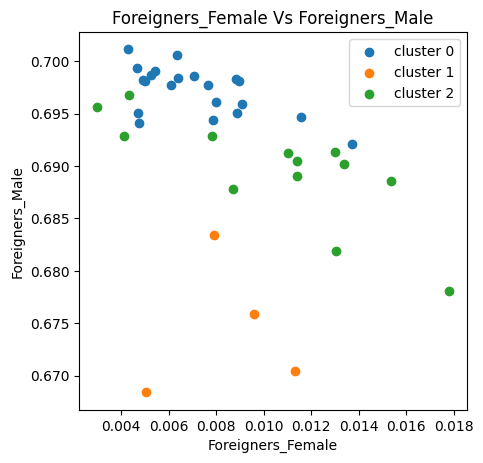

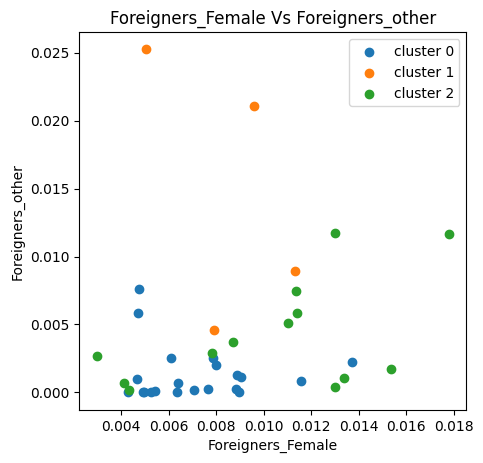

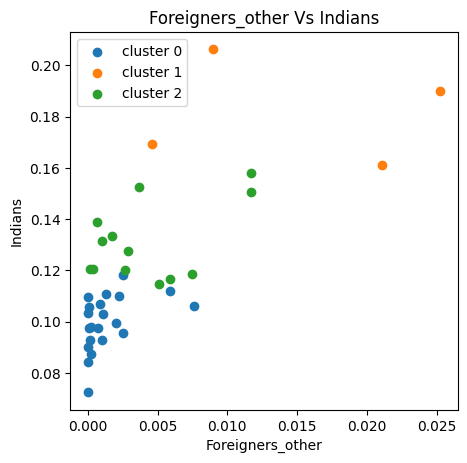

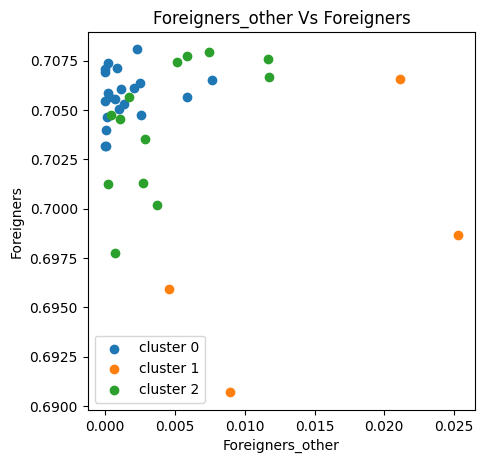

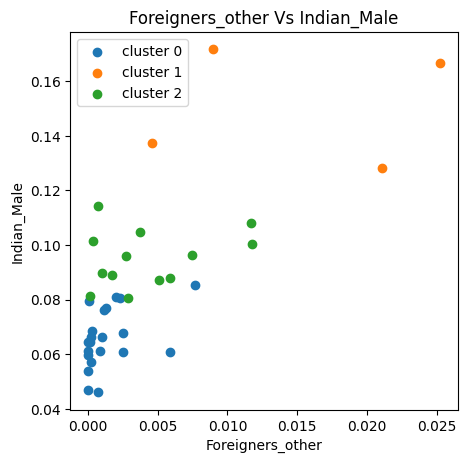

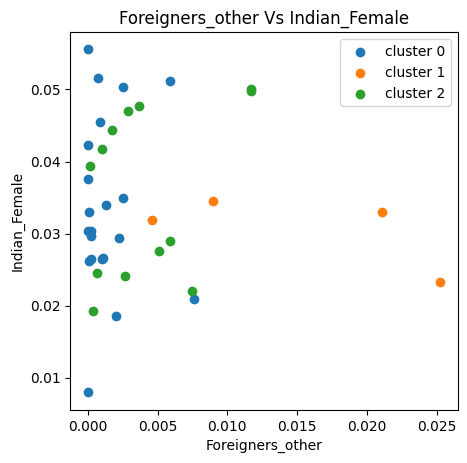

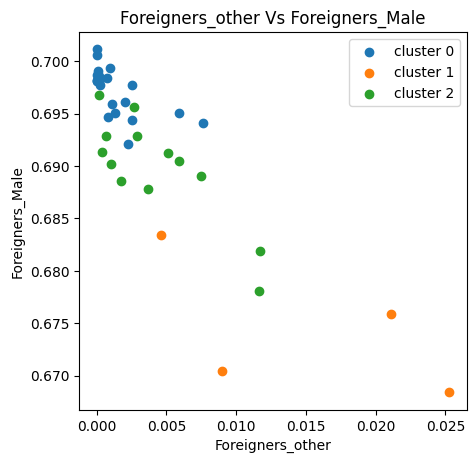

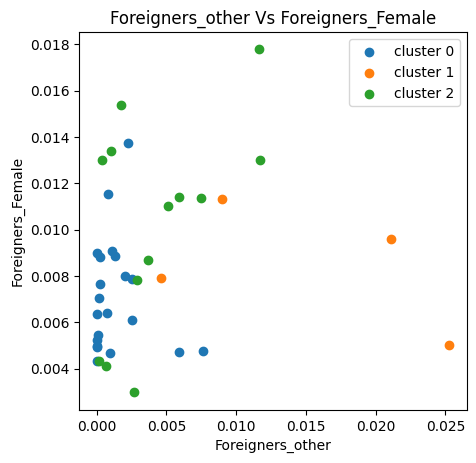

In [66]:
for x in data1.drop(columns=['cluster']).columns:
    for y in data1.drop(columns=['cluster']).columns:
        if x!=y:
            plot_clusters(x,y,3)